In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np

from tmm_ml_models import ForwardTMMModel, ReverseTMMModel
data = pd.read_csv("Data-version-2.csv", index_col="Wl")
data = data.transpose()


In [132]:
reverse_model = ReverseTMMModel(serialised_model_path="reverse_model.mdlsav")
print(reverse_model.is_trained)

True


In [133]:
forward_model = ForwardTMMModel(serialised_model_path="forward_model.mdlsav")
print(forward_model.is_trained)

True


In [134]:
def func1(x):
    return (1-(1/(1+np.exp((-(x-550))/15))))*.6+.2

In [177]:
x_values = np.arange(400, 751)
input_sample = []
for x in x_values:
    input_sample.append(func1(x))


input_sample = pd.DataFrame(np.array([input_sample]))


In [178]:
input_sample = data.iloc[[2]]
input_sample=input_sample*.6
input_sample=input_sample+.2

In [179]:
mat_predict = reverse_model.predict(input_sample)
pred = mat_predict[["First Layer", "Second Layer"]]
print(f"model predicted: {pred}")

1/1 [==============================] - 0s 67ms/step
model predicted:      First Layer Second Layer
Ex.3       Nb2O5         SiO2


1/1 [==============================] - 0s 59ms/step


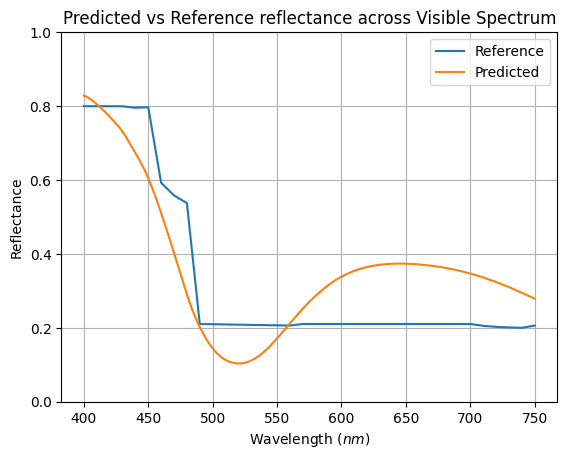

In [180]:
predicted_waveform = forward_model.predict(mat_predict)
import matplotlib.pyplot as plt

x = np.arange(400,751)

plt.plot(x, input_sample.values.T, label="Reference")
plt.plot(x, predicted_waveform.values.T, label="Predicted")

plt.ylim((0,1))
plt.xlabel(r"Wavelength ($nm$)")
plt.ylabel("Reflectance")
plt.grid()
plt.title("Predicted vs Reference reflectance across Visible Spectrum")

plt.legend()